In [6]:
# Imports
import investpy
import pandas as pd
import numpy as np
import yfinance as yf
import geopandas as gpd
from keplergl import KeplerGl
from pathlib import Path

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Import Wheat Data

In [7]:
wheat_df = investpy.get_commodity_historical_data(commodity = 'US Wheat',country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
wheat_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-02,653.13,653.13,653.13,653.13,0,USD
2012-01-03,665.88,670.50,654.00,658.38,0,USD
2012-01-04,656.38,661.13,645.63,650.13,0,USD
2012-01-05,649.13,650.13,627.13,627.38,0,USD
2012-01-06,629.38,636.88,624.63,624.63,0,USD


# Editing the Data to specify the Close price and giving the colum name a more specific name.

In [8]:
wheat_df = wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1)
wheat_df = wheat_df.rename(columns = {'Close': 'Wheat'})
wheat_df.head(5)

,Wheat
Date,
2012-01-02,653.13
2012-01-03,658.38
2012-01-04,650.13
2012-01-05,627.38
2012-01-06,624.63


# Import Crude Data

In [9]:
crude_df = investpy.get_commodity_historical_data(commodity = 'Crude Oil WTI', country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
crude_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-03,99.70,103.18,99.65,102.96,275481,USD
2012-01-04,102.99,103.74,101.88,103.22,271711,USD
2012-01-05,103.29,103.73,101.30,101.81,295615,USD
2012-01-06,101.35,102.80,100.88,101.56,290458,USD
2012-01-09,101.92,102.15,100.10,101.31,311866,USD


# Edit and clean data

In [10]:
crude_df = crude_df.drop(['Open','High','Low','Volume','Currency'],axis=1)
crude_df = crude_df.rename(columns = {'Close': 'Crude'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


# Import Carbon futures data

In [11]:
carbon_df = pd.read_csv("../Data/Carbon Emissions Futures Historical Data.csv")
carbon_df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2022",81.98,80.33,82.19,79.87,11.33K,1.67%
1,"Aug 01, 2022",80.63,78.10,80.83,78.10,10.51K,2.49%
2,"Jul 29, 2022",78.67,78.96,79.50,77.57,11.48K,-0.04%
3,"Jul 28, 2022",78.70,76.07,80.10,76.07,14.23K,3.19%
4,"Jul 27, 2022",76.27,76.61,77.79,75.80,13.54K,-0.64%


# Edit Carbon data

In [12]:
carbon_df.reset_index()
carbon_df.rename(columns={'Price':'Carbon Futures'})
carbon_df['Date'] = pd.to_datetime(carbon_df.Date)
carbon_df['Date'] = carbon_df['Date'].dt.strftime('%Y-%m-%d')

carbon_df.head(5)


,Date,Price,Open,High,Low,Vol.,Change %
0,2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
1,2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2,2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
3,2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
4,2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [13]:
carbon_df = carbon_df.set_index("Date")
carbon_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [14]:
crude_df = crude_df.rename(columns = {'Price': 'Carbon'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


In [15]:
crude_df.index = pd.to_datetime(crude_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
carbon_df.index = pd.to_datetime(carbon_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
wheat_df.index = pd.to_datetime(wheat_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')

In [16]:
crudecarbon = pd.merge(crude_df,carbon_df,on="Date", how='inner')
crudecarbon = crudecarbon.drop(['Open','High','Low','Vol.','Change %'],axis=1)
crudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)
crudecarbon

,Crude,Carbon
Date,,
2012-01-03,102.96,6.28
2012-01-04,103.22,6.27
2012-01-05,101.81,6.43
2012-01-06,101.56,6.30
2012-01-09,101.31,11.00
...,...,...
2021-12-27,75.57,76.92
2021-12-28,75.98,79.29
2021-12-29,76.56,80.36


In [17]:
wheatcrudecarbon = pd.merge(crudecarbon,wheat_df, on='Date',how='inner')
wheatcrudecarbon

,Crude,Carbon,Wheat
Date,,,
2012-01-03,102.96,6.28,658.38
2012-01-04,103.22,6.27,650.13
2012-01-05,101.81,6.43,627.38
2012-01-06,101.56,6.30,624.63
2012-01-09,101.31,11.00,642.38
...,...,...,...
2021-12-27,75.57,76.92,804.00
2021-12-28,75.98,79.29,783.50
2021-12-29,76.56,80.36,787.75


In [18]:
wheatcrudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)

In [19]:
returns = wheatcrudecarbon.dropna()
returns.head(3)

,Crude,Carbon,Wheat
Date,,,
2012-01-03,102.96,6.28,658.38
2012-01-04,103.22,6.27,650.13
2012-01-05,101.81,6.43,627.38


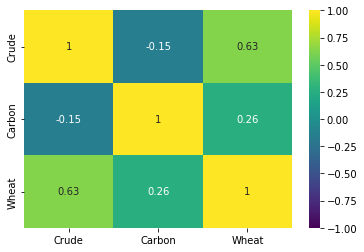

In [20]:
# Show correlation matrix
sns.heatmap(returns.corr(),cmap='viridis',annot=True,vmin=-1, vmax=1);

# Import Wheat Data

In [21]:
# Get historical wheat price data from investpy
wheat_df = pd.read_csv("../Data/wheat_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')
                    
                      

# Import Copper Data

In [22]:
# Get historical copper price data from investpy
copper_df =pd.read_csv("../Data/copper_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

# Import Dollar_index Data

In [23]:
# Get historical Dollar Index data from investpy
dollar_df = pd.read_csv("../Data/dollar_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

# Import drought dataset

In [24]:
#drought dataset
drought_df = pd.read_csv("../Data/drought_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')
drought_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

# Import Urea dataset

In [25]:
# Urea dataset
Urea_df = pd.read_csv("../Data/Urea_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

In [26]:
# Combine data frames
combined_df = pd.concat([dollar_df,copper_df,Urea_df,drought_df,wheat_df],axis=1,join='inner')

In [27]:
# Create correlation matrix
correlations_df = combined_df.corr()
correlations_df

,Dollar,Copper,Urea,Drought,wheat
Dollar,1.000000,-0.524551,-0.312546,0.482855,-0.680653
Copper,-0.524551,1.000000,0.719500,-0.647951,0.705907
Urea,-0.312546,0.719500,1.000000,-0.463255,0.680342
Drought,0.482855,-0.647951,-0.463255,1.000000,-0.621489
wheat,-0.680653,0.705907,0.680342,-0.621489,1.000000


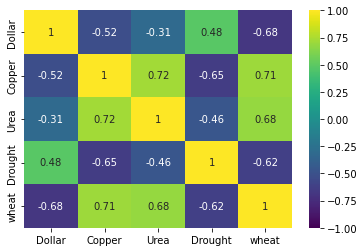

In [28]:
# Show correlation matrix
sns.heatmap(correlations_df,cmap='viridis',annot=True,vmin=-1,vmax=1);

# Import Wheat Data

In [29]:
# Get historical wheat price data from investpy
wheat_df = pd.read_csv("../Data/wheat_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')

# Import Crude Data

In [30]:
# Get historical crude oil price data from investpy
crude_df = pd.read_csv("../Data/crude_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')
   

# Import Carbon futures data

In [31]:
# Get historical Carbon futures price data from investpy
Carbon_df = pd.read_csv("../Data/Carbon_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')

In [32]:
# Combine data frames
combined_df_ = pd.concat([crude_df,Carbon_df,wheat_df],axis=1,join='inner')

In [33]:
# Create correlation matrix
correlations_df = combined_df_.corr()
correlations_df

,Crude,carbon futures,wheat
Crude,1.000000,-0.149471,0.630284
carbon futures,-0.149471,1.000000,0.260287
wheat,0.630284,0.260287,1.000000


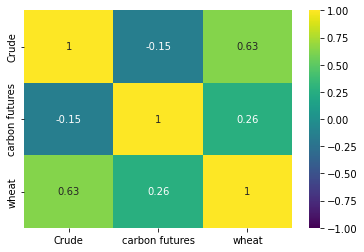

In [34]:
# Show correlation matrix
sns.heatmap(correlations_df,cmap='viridis',annot=True,vmin=-1,vmax=1);

In [35]:
US = 'united states'
START = '01/01/1992'
END = '01/01/2022'

In [47]:
# Get historical wheat price data from investpy
wheat_df = investpy.get_commodity_historical_data(commodity = 'US Wheat',
                                                  country = US,
                                                  from_date = START,
                                                  to_date = END)
wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
wheat_df.rename(columns = {'Close': 'Wheat'}, inplace=True)

In [37]:
# Get historical Dollar Index data from investpy
dx_df = investpy.get_index_historical_data(index = 'US Dollar Index',
                                           country = US,
                                           from_date = START,
                                           to_date = END)
dx_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
dx_df.rename(columns = {'Close': 'Dollar'}, inplace=True)

In [38]:
# Get historical copper price data from investpy
copper_df = investpy.get_commodity_historical_data(commodity = 'Copper',
                                                   country = US,
                                                   from_date = START,
                                                   to_date = END)
copper_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
copper_df.rename(columns = {'Close': 'Copper'}, inplace=True)

In [39]:
# Create function to convert string date to datetime object
def convert_date_urea(date):
    return pd.to_datetime(date[-4:] + date[:4].strip(), format='%Y%b')

In [40]:
# Import urea (nitrogen fertilizer) price data
urea_df = pd.read_html("https://www.indexmundi.com/commodities/?commodity=urea&months=360")[1].drop(columns='Change', axis=0)

In [41]:
# Apply date conversion and reset index
urea_df.Month = urea_df.Month.apply(convert_date_urea)
urea_df.set_index('Month', inplace=True)

In [42]:
# Rename column
urea_df.rename(columns = {'Price': 'Urea'}, inplace=True)

In [43]:
# Create function to convert string date to datetime object
def convert_date_drought(date):
    date = str(date)
    return pd.to_datetime(date[:5] + date[5:], format='%Y%m')

In [48]:
# Import Palmer Drought Severity Index data for the Great Plains region
drought_df = pd.read_csv('../Data/pdsi1992-2022.csv')

In [49]:
# Apply date conversion and reset index
drought_df.Date = drought_df.Date.apply(convert_date_drought)
drought_df.set_index('Date', inplace=True)

In [50]:
# Drop and rename columns
drought_df.drop(columns='Anomaly', axis=0, inplace=True)
drought_df.rename(columns = {'Value': 'Drought'}, inplace=True)


In [51]:
# Combine data frames
combined_df = pd.concat([dx_df,copper_df,urea_df,drought_df,wheat_df], axis=1, join='outer')

In [52]:
# Seperate out month and year from index
combined_df['Month'] = combined_df.index.month
combined_df['Year'] = combined_df.index.year


In [53]:
# Fill nulls in Urea and Drought with monthly value and
# compute monthly average for Wheat, Dollar, and Copper
combined_df = combined_df.groupby(['Year','Month']).mean().dropna()
combined_df

Dollar    Copper    Urea  Drought       Wheat
Year Month                                                  
1992 7      82.406087  1.136500  120.00     2.92  337.284091
     8      80.834286  1.123000  120.00     3.78  312.386364
     9      81.725909  1.073952  120.00     3.25  333.238095
     10     84.954545  1.001045  116.88     2.53  349.556818
     11     89.924286  0.961263  107.50     3.35  369.369048
...               ...       ...     ...      ...         ...
2021 8      92.799545  4.275977  446.88    -2.32  725.738636
     9      92.952727  4.251239  418.75    -3.06  704.693182
     10     93.945238  4.384524  695.00    -2.37  745.547619
     11     95.341364  4.346636  900.50    -3.00  806.619048
     12     96.208182  4.323957  890.00    -3.28  788.817391

[354 rows x 5 columns]

In [54]:
# Create correlation matrix
correlations_df = combined_df.corr()
correlations_df

,Dollar,Copper,Urea,Drought,Wheat
Dollar,1.000000,-0.583588,-0.542880,-0.008699,-0.652276
Copper,-0.583588,1.000000,0.799196,-0.300945,0.822573
Urea,-0.542880,0.799196,1.000000,-0.292428,0.781340
Drought,-0.008699,-0.300945,-0.292428,1.000000,-0.215552
Wheat,-0.652276,0.822573,0.781340,-0.215552,1.000000


In [55]:
# Create mask for correlation heatmap
mask = np.triu(np.ones_like(correlations_df))
np.fill_diagonal(mask, 0)

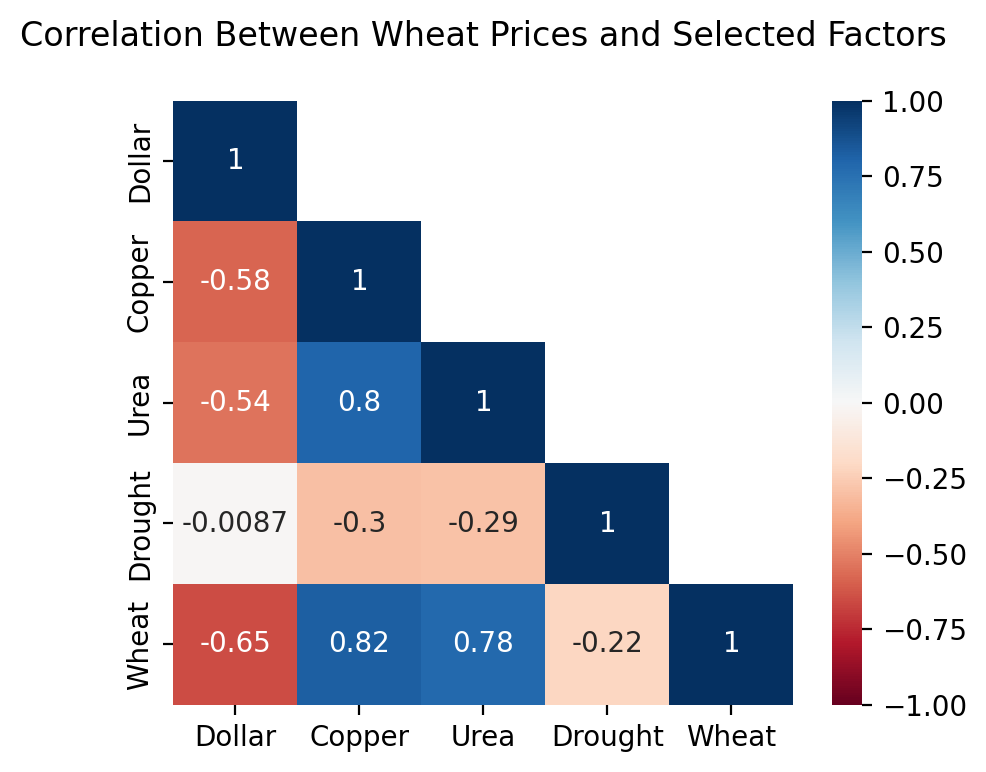

In [56]:
# Show correlation heatmap
fig, ax = plt.subplots(figsize=(5, 4),dpi=200)
sns.heatmap(correlations_df,cmap='RdBu',annot=True, vmin=-1, vmax=1, ax=ax, mask=mask)
ax.set_title('Correlation Between Wheat Prices and Selected Factors\n')
plt.show()

In [57]:
# Kraft stock data
# Get historical wheat price data from investpy
khc_df = investpy.get_stock_historical_data(stock = 'KHC',
                                                  country = US,
                                                  from_date = START,
                                                  to_date = END)
khc_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
khc_df.rename(columns = {'Close': 'KHC'}, inplace=True)

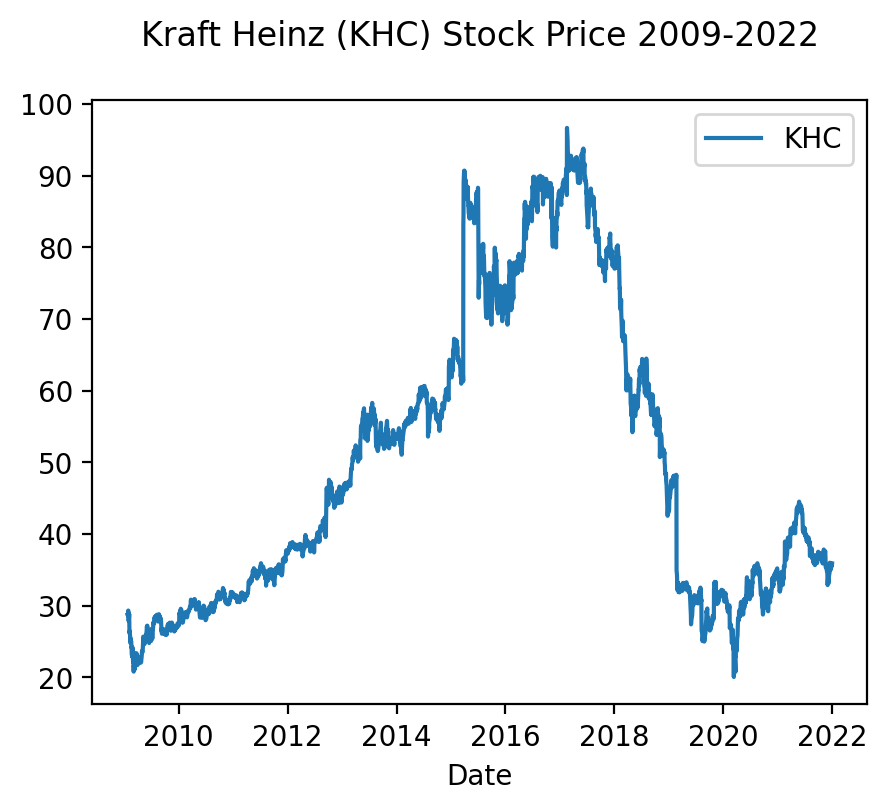

In [58]:
# Show correlation heatmap
fig, ax = plt.subplots(figsize=(5, 4),dpi=200)
sns.lineplot(data=khc_df,ax=ax)
ax.set_title('Kraft Heinz (KHC) Stock Price 2009-2022\n')
plt.show()